In [ ]:
import torch
vers = torch.__version__
print("Torch vers: ", vers)

# PyG installation
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-${TORCH}+${CUDA}.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-${TORCH}+${CUDA}.html
!pip install -q git+https://github.com/rusty1s/pytorch_geometric.git

import torch_geometric

Torch vers:  1.13.1+cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 KB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Dataset

- Contains news propagation graphs extracted from Twitter
- Source and raw data: https://github.com/KaiDMML/FakeNewsNet
- Preprocessing: https://arxiv.org/pdf/2104.12259.pdf
- feature="content" --> Spacy Word2Vec + Profile features


In [ ]:
from torch_geometric.datasets import UPFD
train_data = UPFD(root=".", name="gossipcop", feature="content", split="train")
test_data = UPFD(root=".", name="gossipcop", feature="content", split="val")
print("Train Samples: ", len(train_data))
print("Test Samples: ", len(test_data))

Train Samples:  1092
Test Samples:  546


In [ ]:
?UPFD

In [ ]:
sample_id=1
train_data[sample_id].edge_index

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,  15,  17,  17,
          22,  22,  22,  22,  23,  26,  26,  26,  26,  26,  26,  26,  26,  27,
          27,  27,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,
          28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,
          28,  28,  28,  28,  28,  28,  28,  28,  30,  34,  34,  38,  38,  38,
          38,  39,  40,  57,  59,  65,  65,  65,  66,  68,  69,  77,  77,  79,
          79,  80,  83,  83,  83,  83,  84, 101, 110, 115, 116, 117],
        [  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
          15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
          29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  43,  44,
          45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  5

In [ ]:
dir(train_data)

['__abstractmethods__',
 '__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_data',
 '_data_list',
 '_download',
 '_indices',
 '_infer_num_classes',
 '_is_protocol',
 '_process',
 'collate',
 'copy',
 'data',
 'download',
 'feature',
 'get',
 'get_summary',
 'has_download',
 'has_process',
 'ids',
 'index_select',
 'indices',
 'len',
 'log',
 'name',
 'num_classes',
 'num_edge_features',
 'num_features',
 'num_node_features',
 'pre_filter',
 'pre_transform',
 'print_summary',
 'process',
 'processed_dir',
 'processed_file_names',


In [ ]:
train_data.data

/usr/local/lib/python3.9/dist-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[63482, 310], edge_index=[2, 62390], y=[1092])

In [ ]:
train_data.x.shape

torch.Size([63482, 310])

In [ ]:
train_data.y.shape

torch.Size([1092])

In [ ]:
next(iter(train_data))

Data(x=[76, 310], edge_index=[2, 75], y=[1])

In [ ]:
next(iter(train_data)).y

tensor([0])

In [ ]:
it = iter(train_data)
next(it)
next(it)
s = next(it)

In [ ]:
s.edge_index

tensor([[0, 0, 0, 1, 1],
        [1, 2, 3, 4, 5]])

In [ ]:
s.x

tensor([[0.5170, 0.5350, 0.5372,  ..., 0.2603, 0.1250, 0.2500],
        [0.5523, 0.5490, 0.5262,  ..., 0.1164, 0.0556, 0.2647],
        [0.5076, 0.5370, 0.5431,  ..., 0.2055, 0.1667, 0.3088],
        [0.5523, 0.5490, 0.5262,  ..., 0.1164, 0.0556, 0.2647],
        [0.5170, 0.5350, 0.5372,  ..., 0.2603, 0.1250, 0.2500],
        [0.4556, 0.5051, 0.5530,  ..., 0.6027, 0.2222, 0.1618]])

In [ ]:
sample_id = 0
print(train_data[sample_id].x.shape)
train_data[sample_id].x

torch.Size([76, 310])


tensor([[0.5100, 0.5259, 0.5432,  ..., 0.6794, 0.1175, 0.1534],
        [0.4455, 0.5350, 0.5522,  ..., 0.0890, 0.1111, 0.1324],
        [0.4417, 0.5409, 0.5583,  ..., 0.4658, 0.1667, 0.1765],
        ...,
        [0.5250, 0.5461, 0.5496,  ..., 0.8904, 0.1111, 0.0588],
        [0.4677, 0.5249, 0.5637,  ..., 0.6233, 0.2222, 0.3529],
        [0.5428, 0.5370, 0.5246,  ..., 0.7740, 0.1111, 0.2500]])

In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(train_data[sample_id].x.shape)
train_data[sample_id].x

torch.Size([125, 310])


tensor([[0.5220, 0.5120, 0.4817,  ..., 0.6874, 0.1023, 0.1529],
        [0.4610, 0.4544, 0.6279,  ..., 0.2055, 0.1667, 0.2500],
        [0.4461, 0.4728, 0.4978,  ..., 0.8356, 0.0556, 0.0000],
        ...,
        [0.5574, 0.4934, 0.5588,  ..., 0.3562, 0.0556, 0.2647],
        [0.5274, 0.5889, 0.4425,  ..., 0.9589, 0.1111, 0.1176],
        [0.5220, 0.5120, 0.4817,  ..., 0.6874, 0.1023, 0.1529]])

<Axes: >

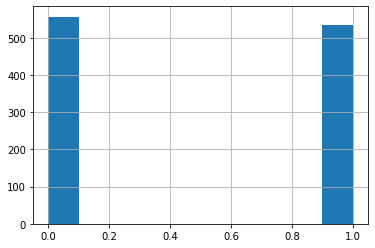

In [ ]:
import pandas as pd
labels = [data.y.item() for i, data in enumerate(train_data)]
df = pd.DataFrame(labels, columns=["Labels"])
df["Labels"].hist()

In [ ]:
from torch_geometric.loader import DataLoader
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

In [ ]:
from torch_geometric.nn import global_max_pool as gmp
from torch_geometric.nn import GATConv
from torch.nn import Linear

class GNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        
        # Graph Convolutions
        self.conv1 = GATConv(in_channels, hidden_channels)
        self.conv2 = GATConv(hidden_channels, hidden_channels)
        self.conv3 = GATConv(hidden_channels, hidden_channels)

        # Readout
        self.lin_news = Linear(in_channels, hidden_channels)
        self.lin0 = Linear(hidden_channels, hidden_channels)
        self.lin1 = Linear(2*hidden_channels, out_channels)

    def forward(self, x, edge_index, batch):
        # Graph Convolutions
        h = self.conv1(x, edge_index).relu()
        h = self.conv2(h, edge_index).relu()
        h = self.conv3(h, edge_index).relu()

        # Pooling
        h = gmp(h, batch)

        # Readout
        h = self.lin0(h).relu()

        # According to UPFD paper: Include raw word2vec embeddings of news 
        # This is done per graph in the batch
        root = (batch[1:] - batch[:-1]).nonzero(as_tuple=False).view(-1)
        root = torch.cat([root.new_zeros(1), root + 1], dim=0)
        # root is e.g. [   0,   14,   94,  171,  230,  302, ... ]
        news = x[root]
        news = self.lin_news(news).relu()
        
        out = self.lin1(torch.cat([h, news], dim=-1))
        return torch.sigmoid(out)

GNN(train_data.num_features, 128, 1)

GNN(
  (conv1): GATConv(310, 128, heads=1)
  (conv2): GATConv(128, 128, heads=1)
  (conv3): GATConv(128, 128, heads=1)
  (lin_news): Linear(in_features=310, out_features=128, bias=True)
  (lin0): Linear(in_features=128, out_features=128, bias=True)
  (lin1): Linear(in_features=256, out_features=1, bias=True)
)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNN(train_data.num_features, 128, 1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)
loss_fnc = torch.nn.BCELoss()

def train(epoch):
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = loss_fnc(torch.reshape(out, (-1,)), data.y.float())
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * data.num_graphs
    return total_loss / len(train_loader.dataset)

@torch.no_grad()
def test(epoch):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    for data in test_loader:
        data = data.to(device)
        out = model(data.x, data.edge_index, data.batch)
        loss = loss_fnc(torch.reshape(out, (-1,)), data.y.float())
        total_loss += float(loss) * data.num_graphs
        all_preds.append(torch.reshape(out, (-1,)))
        all_labels.append(data.y.float())

    # Calculate Metrics
    accuracy, f1 = metrics(all_preds, all_labels)

    return total_loss / len(test_loader.dataset), accuracy, f1


def metrics(preds, gts):
    preds = torch.round(torch.cat(preds))
    gts = torch.cat(gts)
    acc = accuracy_score(preds, gts)
    f1 = f1_score(preds, gts)
    return acc, f1

In [ ]:
for epoch in range(40):
    train_loss = train(epoch)
    test_loss, test_acc, test_f1 = test(epoch)
    print(f'Epoch: {epoch:02d} |  TrainLoss: {train_loss:.2f} | '
          f'TestLoss: {test_loss:.2f} | TestAcc: {test_acc:.2f} | TestF1: {test_f1:.2f}')

Epoch: 00 |  TrainLoss: 0.74 | TestLoss: 0.75 | TestAcc: 0.50 | TestF1: 0.00
Epoch: 01 |  TrainLoss: 0.71 | TestLoss: 0.69 | TestAcc: 0.50 | TestF1: 0.00
Epoch: 02 |  TrainLoss: 0.69 | TestLoss: 0.68 | TestAcc: 0.54 | TestF1: 0.14
Epoch: 03 |  TrainLoss: 0.69 | TestLoss: 0.68 | TestAcc: 0.83 | TestF1: 0.85
Epoch: 04 |  TrainLoss: 0.67 | TestLoss: 0.67 | TestAcc: 0.65 | TestF1: 0.47
Epoch: 05 |  TrainLoss: 0.68 | TestLoss: 0.66 | TestAcc: 0.50 | TestF1: 0.67
Epoch: 06 |  TrainLoss: 0.69 | TestLoss: 0.66 | TestAcc: 0.55 | TestF1: 0.18
Epoch: 07 |  TrainLoss: 0.66 | TestLoss: 0.65 | TestAcc: 0.62 | TestF1: 0.40
Epoch: 08 |  TrainLoss: 0.66 | TestLoss: 0.64 | TestAcc: 0.55 | TestF1: 0.20
Epoch: 09 |  TrainLoss: 0.65 | TestLoss: 0.66 | TestAcc: 0.50 | TestF1: 0.02
Epoch: 10 |  TrainLoss: 0.63 | TestLoss: 0.66 | TestAcc: 0.50 | TestF1: 0.67
Epoch: 11 |  TrainLoss: 0.64 | TestLoss: 0.61 | TestAcc: 0.52 | TestF1: 0.67
Epoch: 12 |  TrainLoss: 0.62 | TestLoss: 0.62 | TestAcc: 0.55 | TestF1: 0.20

In [ ]:
for data in test_loader:
    data = data.to(device)
    pred = model(data.x, data.edge_index, data.batch)
    df = pd.DataFrame()
    df["pred_logit"] = pred.detach().numpy()[:,0]
    df["pred"] = torch.round(pred).detach().numpy()[:,0]
    df["true"] = data.y.numpy()
    print(df.head(10))
    break

   pred_logit  pred  true
0    0.848001   1.0     1
1    0.719532   1.0     1
2    0.419808   0.0     0
3    0.728294   1.0     1
4    0.139804   0.0     0
5    0.390725   0.0     0
6    0.304375   0.0     0
7    0.916404   1.0     1
8    0.147848   0.0     0
9    0.292413   0.0     0
